In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
with open("NUCLEUS_TESTV2.json", "r") as fjson:
    config = json.load(fjson)

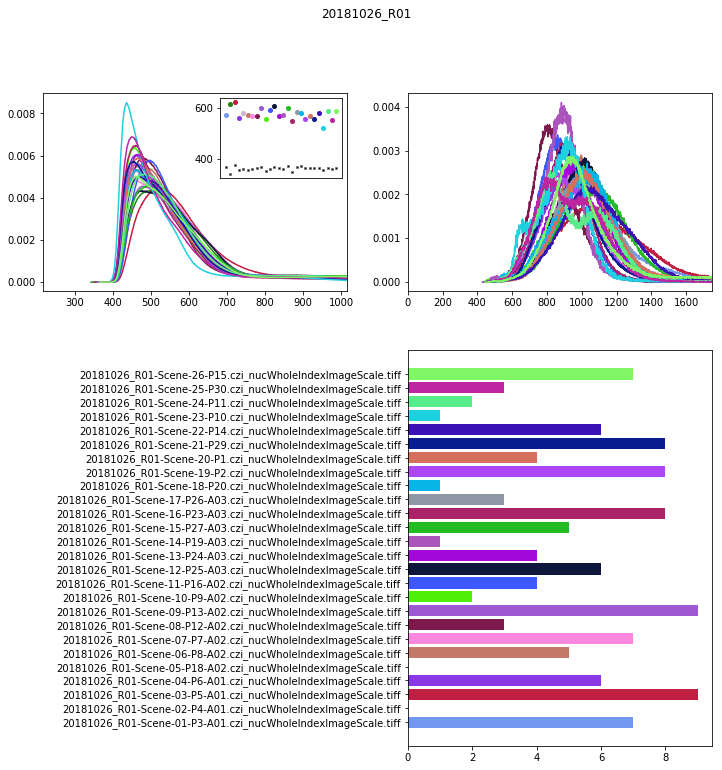

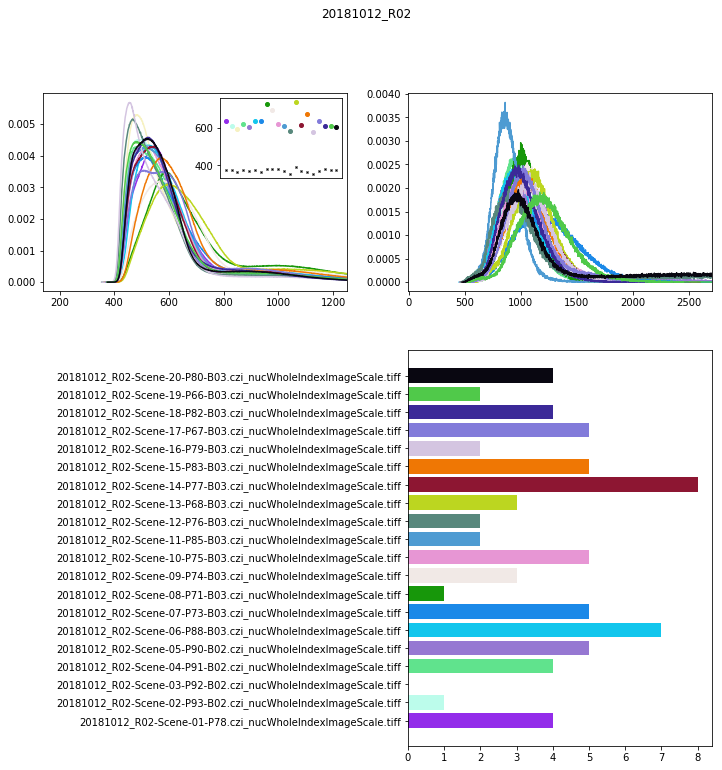

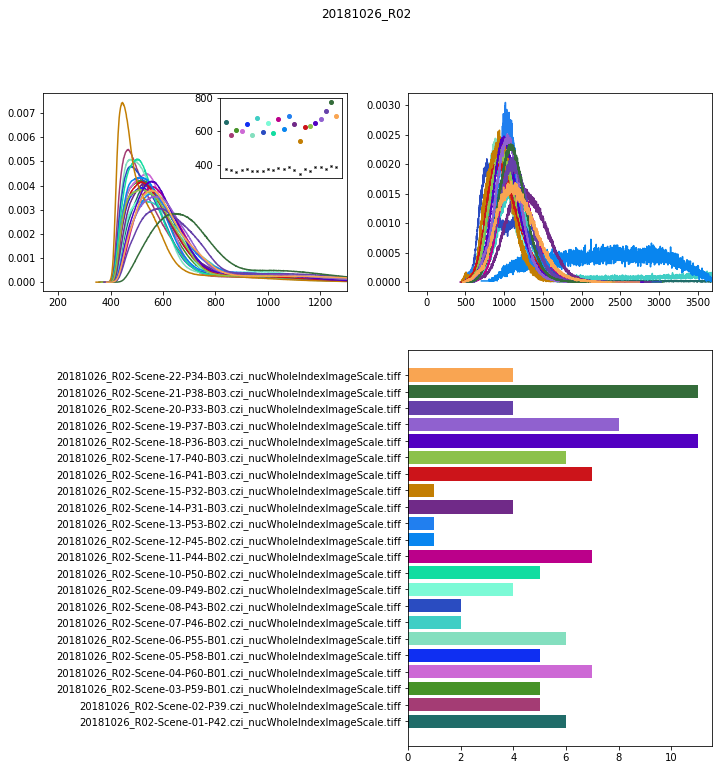

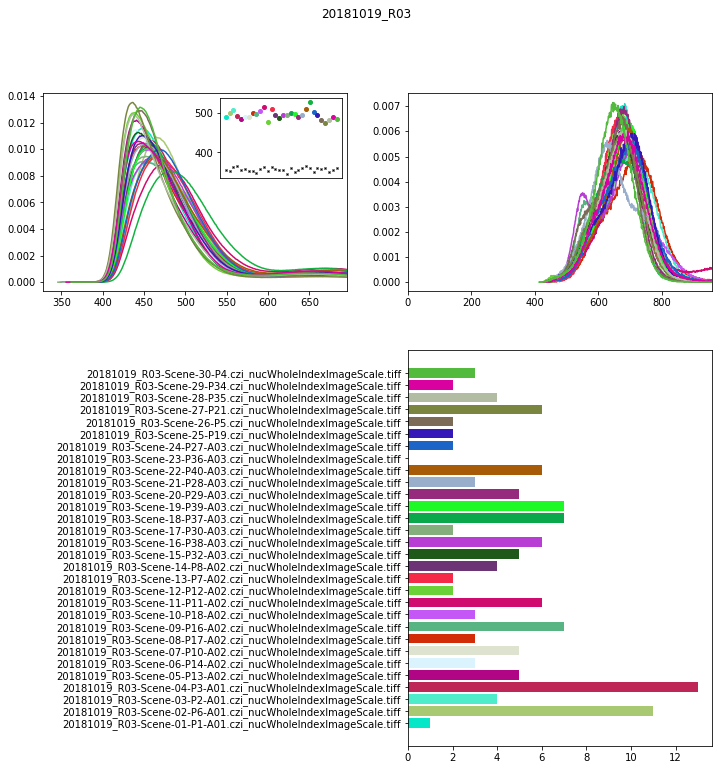

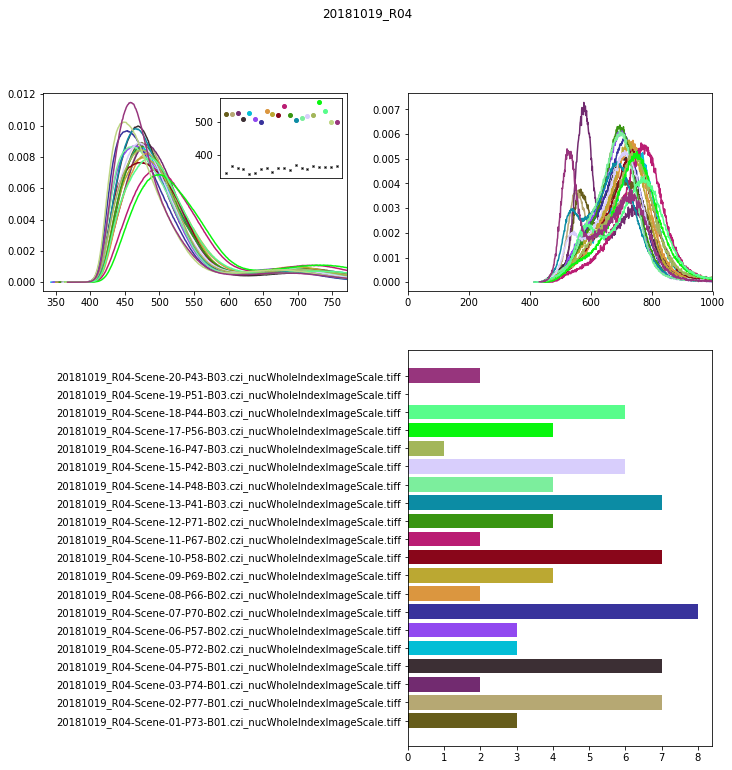

In [15]:
plots = []
for czi in config["data"]:

    fig, ax = plt.subplots(2,2,
                           figsize=(12,12),
                           gridspec_kw={'height_ratios':[1, 2]})
    fig.suptitle(czi["czi_name"])

    inset = inset_axes(ax[0,0], width="40%", height="40%")
    
    names = []
    xmin_f, xmin_b = [], []
    xmax_f, xmax_b = [], []
    for pos_id, position in enumerate(czi["position"]):
        hf = position["hist_foreground"]
        hb = position["hist_background"]

        fx = np.array(hf["x"])
        fy = np.array(hf["y"])
        fy = fy / fy.sum()
        avg_f = (fx*fy).sum()
        std_f = np.sqrt(((fx**2)*fy).sum()-(avg_f**2))

        bx = np.array(hb["x"])
        by = np.array(hb["y"])
        by = by / by.sum()
        avg_b = (bx*by).sum()
        std_b = np.sqrt(((bx**2)*by).sum()-(avg_b**2))
        
        xmin_b.append(avg_b-2*std_b)
        xmax_b.append(avg_b+2*std_b)
        xmin_f.append(avg_f-2*std_f)
        xmax_f.append(avg_f+2*std_f)

        rcolor = np.random.rand(3,)
        ax[0,0].plot(bx, by, c=rcolor)
        inset.set_xticks([])
        inset.plot(pos_id, avg_b, "o", c=rcolor, markersize=4)
        inset.plot(pos_id, bx.min(), "x", c="black", markersize=2)
        
        ax[0,1].plot(fx, fy, c=rcolor)

        ax[1,1].barh(pos_id, len(position["cell_id"]), color=rcolor)
        
        names.append(position["name"])
        
    ax[0,0].set_xlim([np.min(xmin_b),np.max(xmax_b)])
    ax[0,1].set_xlim([np.min(xmin_f),np.max(xmax_f)])
    ax[1,0].axis("off")
    ax[1,1].yaxis.set_ticks(np.arange(0,len(names)))
    ax[1,1].set_yticklabels(names)

    plots.append(fig)

pp = PdfPages("test.pdf")
for fig in plots:
    pp.savefig(fig, dpi = 300, transparent = True)
pp.close()